In [111]:
import pandas as pd
pd.set_option('display.max_rows', 200)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
init_notebook_mode(connected=True)
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.api as sm
import plotly.graph_objs as go
plt.style.use('ggplot') 
%matplotlib inline

# Data validation and cleaning

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wnqi/DSSS/main/index2022.csv') 
df.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Unnamed: 27,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1.0,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,NaN,NaN,...,Afghanistan,38.9,78.73,-5.0,1.0,2390.02,11.7,5.6,13.0,7.8
1,2.0,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,Albania,2.8,40.74,-3.5,2.0,14218.11,11.7,1.6,1107.0,76.0
2,3.0,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,Algeria,43.9,491.46,-6.0,0.1,11112.19,12.8,2.4,1125.0,53.1
3,4.0,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,Angola,32.9,215.11,-4.0,-1.9,6931.86,7.7,22.3,-1866.0,127.1
4,5.0,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,Argentina,45.4,941.85,-10.0,-2.8,20750.99,11.7,42.0,4123.0,103.0


In [22]:
df=df.rename(columns={'2022 Score':'Score',
                      'Population (Millions)':'Population',
                       'GDP (Billions, PPP)':'GDP',
                       'GDP Growth Rate (%)':'GDP_GR',
                       '5 Year GDP Growth Rate (%)':'GDP_GR5',
                       'GDP per Capita (PPP)':'GDP_PC',
                       'Unemployment (%)':'Unemployment',
                       'Inflation (%)':'Inflation',
                       'FDI Inflow (Millions)':'FDI',
                       'Public Debt (% of GDP)':'Public_Debt'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 1 to 183
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  170 non-null    object 
 1   Score         170 non-null    float64
 2   Population    170 non-null    float64
 3   GDP           170 non-null    float64
 4   GDP_GR        170 non-null    float64
 5   GDP_GR5       170 non-null    float64
 6   GDP_PC        170 non-null    float64
 7   Unemployment  170 non-null    float64
 8   Inflation     170 non-null    float64
 9   FDI           170 non-null    float64
 10  Public_Debt   170 non-null    float64
dtypes: float64(10), object(1)
memory usage: 15.9+ KB


In [12]:
df.drop(df.columns[[0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], 
        axis=1, inplace=True)

IndexError: index 11 is out of bounds for axis 0 with size 11

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  184 non-null    object 
 1   2022 Score    177 non-null    float64
 2   Population    184 non-null    float64
 3   GDP           181 non-null    float64
 4   GDP_GR        183 non-null    float64
 5   GDP_GR5       183 non-null    float64
 6   GDP_PC        181 non-null    float64
 7   Unemployment  180 non-null    float64
 8   Inflation     179 non-null    float64
 9   FDI           180 non-null    float64
 10  Public_Debt   181 non-null    float64
dtypes: float64(10), object(1)
memory usage: 16.3+ KB


In [14]:
df.count()

Country Name    184
2022 Score      177
Population      184
GDP             181
GDP_GR          183
GDP_GR5         183
GDP_PC          181
Unemployment    180
Inflation       179
FDI             180
Public_Debt     181
dtype: int64

In [15]:
df.isnull().sum()

Country Name     4
2022 Score      11
Population       4
GDP              7
GDP_GR           5
GDP_GR5          5
GDP_PC           7
Unemployment     8
Inflation        9
FDI              8
Public_Debt      7
dtype: int64

In [19]:
df=df.dropna()

In [20]:
df.isnull().sum()

Country Name    0
2022 Score      0
Population      0
GDP             0
GDP_GR          0
GDP_GR5         0
GDP_PC          0
Unemployment    0
Inflation       0
FDI             0
Public_Debt     0
dtype: int64

# Data preprocessing

In [21]:
df['Country Name'].describe()

count         170
unique        170
top       Albania
freq            1
Name: Country Name, dtype: object

In [23]:
df['Score'].describe()

count    170.000000
mean      60.538235
std       10.735894
min       24.800000
25%       53.300000
50%       59.900000
75%       67.925000
max       84.400000
Name: Score, dtype: float64

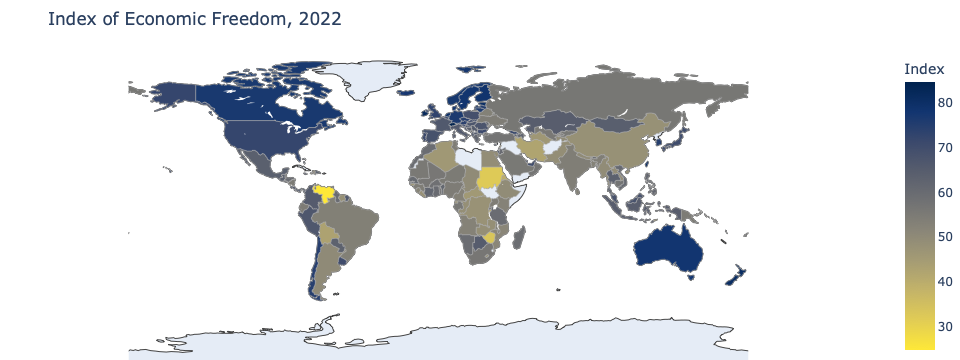

In [41]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country Name'],
    locationmode='country names',
    z=df['Score'],
    text=df['Country Name'],
    colorscale='Cividis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Index'
))

fig.update_layout(
    title_text='Index of Economic Freedom, 2022',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [24]:
df['Population'].describe()

count     170.000000
mean       44.320000
std       155.472938
min         0.100000
25%         2.825000
50%         9.800000
75%        32.125000
max      1402.100000
Name: Population, dtype: float64

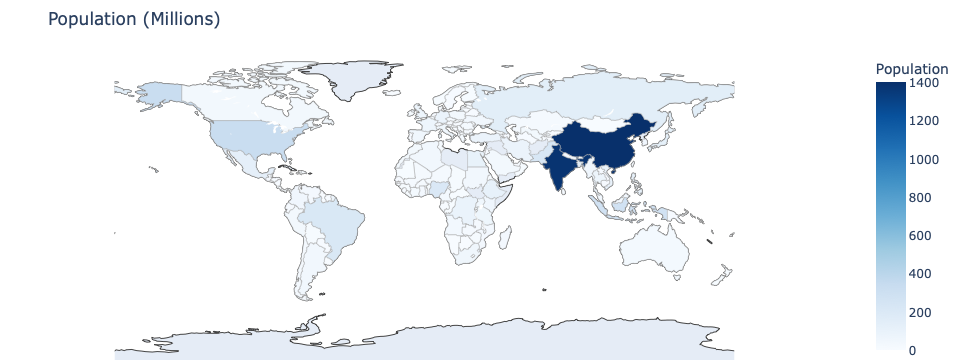

In [43]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country Name'],
    locationmode='country names',
    z=df['Population'],
    text=df['Country Name'],
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Population'
))

fig.update_layout(
    title_text='Population (Millions)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [25]:
df['GDP'].describe()

count      170.000000
mean       767.043647
std       2622.009871
min          0.620000
25%         31.057500
50%        103.865000
75%        486.435000
max      24142.830000
Name: GDP, dtype: float64

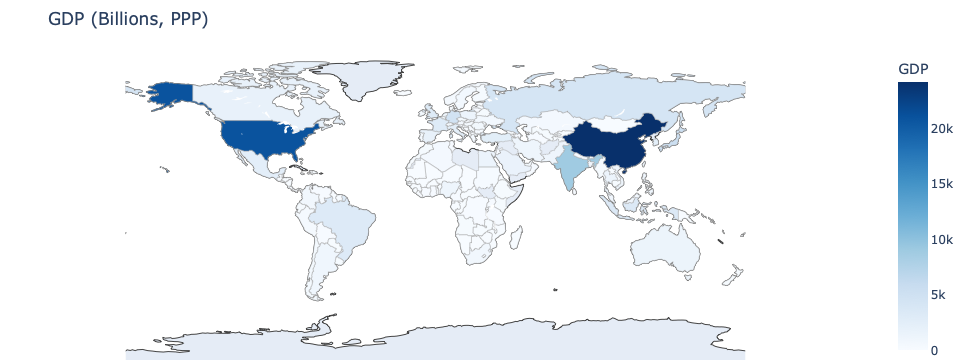

In [44]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country Name'],
    locationmode='country names',
    z=df['GDP'],
    text=df['Country Name'],
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='GDP'
))

fig.update_layout(
    title_text='GDP (Billions, PPP)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [26]:
df['GDP_GR'].describe()

count    170.000000
mean      -4.421176
std        6.760626
min      -32.200000
25%       -7.000000
50%       -3.850000
75%       -1.000000
max       43.400000
Name: GDP_GR, dtype: float64

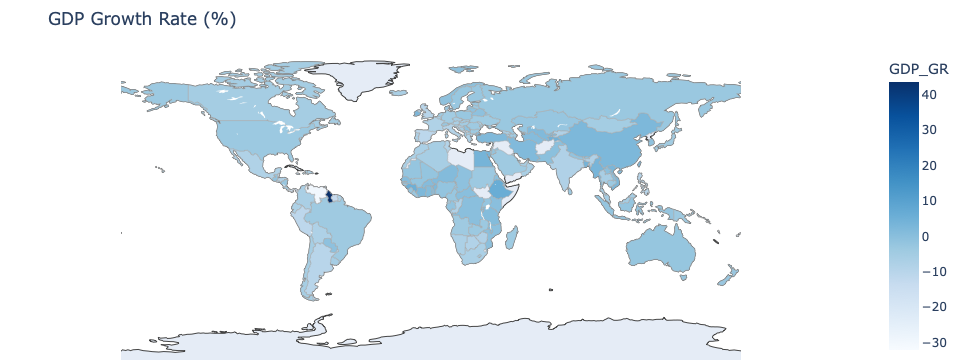

In [45]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country Name'],
    locationmode='country names',
    z=df['GDP_GR'],
    text=df['Country Name'],
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='GDP_GR'
))

fig.update_layout(
    title_text='GDP Growth Rate (%)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [27]:
df['GDP_GR5'].describe()

count    170.000000
mean       1.505294
std        3.207374
min      -23.500000
25%        0.100000
50%        1.500000
75%        3.000000
max       12.100000
Name: GDP_GR5, dtype: float64

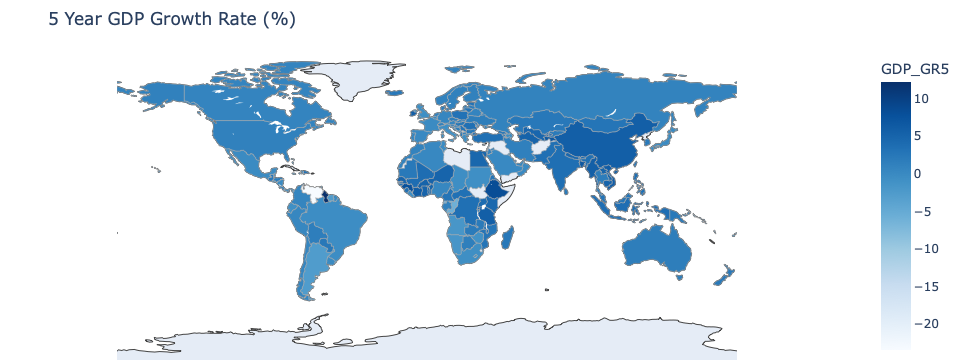

In [46]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country Name'],
    locationmode='country names',
    z=df['GDP_GR5'],
    text=df['Country Name'],
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='GDP_GR5'
))

fig.update_layout(
    title_text='5 Year GDP Growth Rate (%)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [28]:
df['GDP_PC'].describe()

count       170.000000
mean      20955.252059
std       21496.455817
min         759.860000
25%        5157.097500
50%       13091.385000
75%       31263.372500
max      118001.580000
Name: GDP_PC, dtype: float64

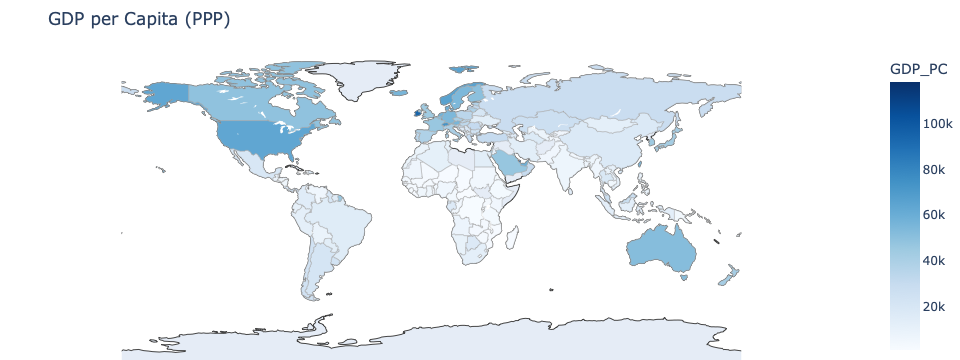

In [47]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country Name'],
    locationmode='country names',
    z=df['GDP_PC'],
    text=df['Country Name'],
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='GDP_PC'
))

fig.update_layout(
    title_text='GDP per Capita (PPP)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [29]:
df['Unemployment'].describe()

count    170.000000
mean       7.833529
std        5.173750
min        0.300000
25%        4.400000
50%        6.400000
75%        9.500000
max       28.700000
Name: Unemployment, dtype: float64

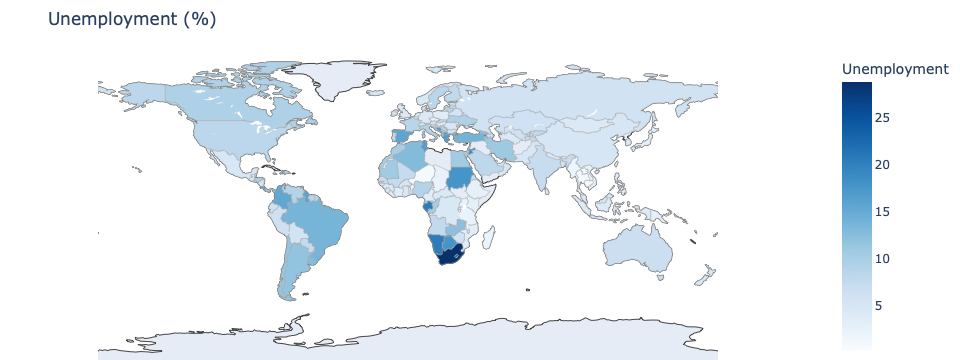

In [48]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country Name'],
    locationmode='country names',
    z=df['Unemployment'],
    text=df['Country Name'],
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Unemployment'
))

fig.update_layout(
    title_text='Unemployment (%)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [30]:
df['Inflation'].describe()

count     170.000000
mean       22.373529
std       185.502166
min        -2.700000
25%         0.600000
50%         2.500000
75%         4.900000
max      2355.100000
Name: Inflation, dtype: float64

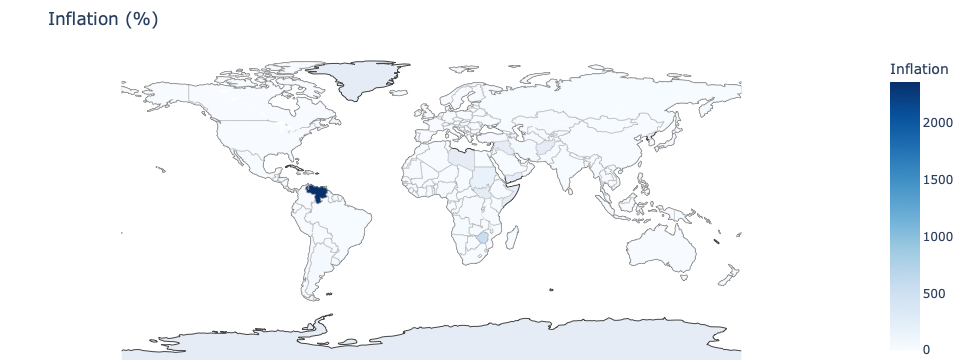

In [49]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country Name'],
    locationmode='country names',
    z=df['Inflation'],
    text=df['Country Name'],
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Inflation'
))

fig.update_layout(
    title_text='Inflation (%)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [31]:
df['FDI'].describe()

count       170.000000
mean       5168.117647
std       22212.019977
min     -115300.000000
25%         103.250000
50%         774.500000
75%        3472.250000
max      156321.000000
Name: FDI, dtype: float64

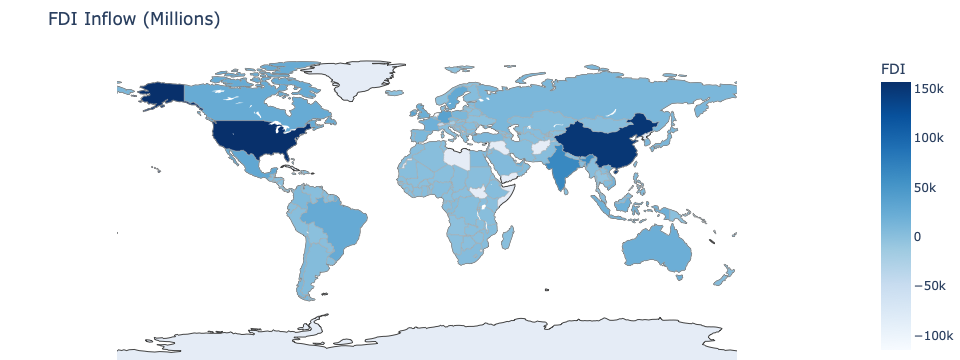

In [50]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country Name'],
    locationmode='country names',
    z=df['FDI'],
    text=df['Country Name'],
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='FDI'
))

fig.update_layout(
    title_text='FDI Inflow (Millions)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [32]:
df['Public_Debt'].describe()

count    170.000000
mean      70.438235
std       44.746926
min        2.900000
25%       43.050000
50%       60.700000
75%       85.000000
max      304.100000
Name: Public_Debt, dtype: float64

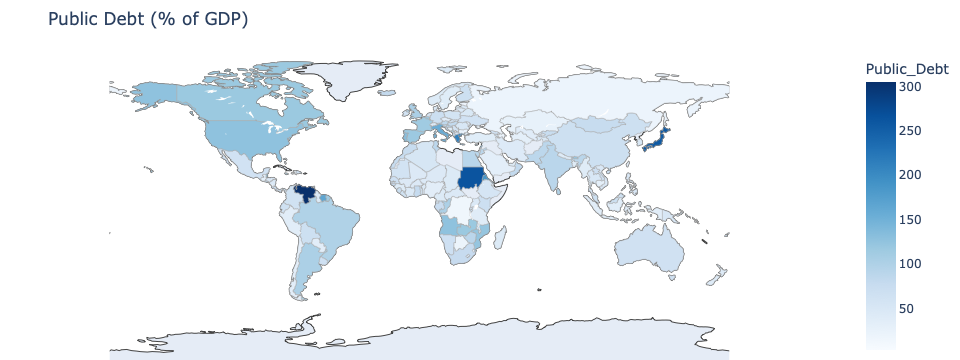

In [51]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country Name'],
    locationmode='country names',
    z=df['Public_Debt'],
    text=df['Country Name'],
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Public_Debt'
))

fig.update_layout(
    title_text='Public Debt (% of GDP)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

# Data analysis

## Correlation between variables

In [52]:
df=df.drop(['Country Name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 1 to 183
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Score         170 non-null    float64
 1   Population    170 non-null    float64
 2   GDP           170 non-null    float64
 3   GDP_GR        170 non-null    float64
 4   GDP_GR5       170 non-null    float64
 5   GDP_PC        170 non-null    float64
 6   Unemployment  170 non-null    float64
 7   Inflation     170 non-null    float64
 8   FDI           170 non-null    float64
 9   Public_Debt   170 non-null    float64
dtypes: float64(10)
memory usage: 14.6 KB


Text(0.5, 1.0, 'Correlation Matrix')

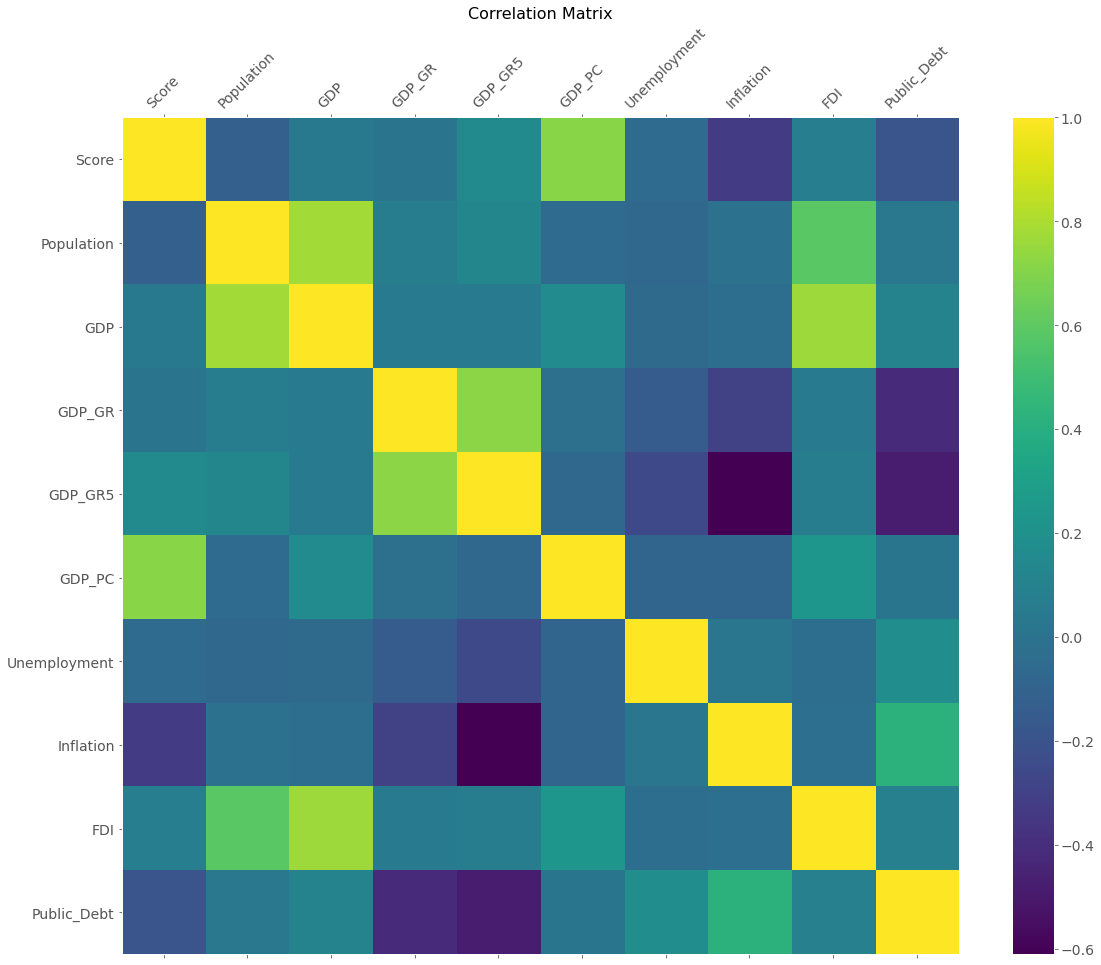

In [54]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number) 
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) 
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14) 
plt.title('Correlation Matrix', fontsize=16)

## Multiple Linear Regression

In [58]:
reg = sm.formula.ols('Score ~ Population + GDP + GDP_GR + GDP_GR5 + GDP_PC + Unemployment + FDI +Inflation + Public_Debt', 
                     df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     31.21
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           5.61e-31
Time:                        21:08:57   Log-Likelihood:                -558.08
No. Observations:                 170   AIC:                             1136.
Df Residuals:                     160   BIC:                             1168.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       50.5822      1.848     27.377      0.000      46.933      54.231
Population      -0.0082      0.006     -1.474      0.142      -0.019       0.003
GDP              0.0004      0.000      1.094      0.275      -0.000       0.001
GDP_GR          -0.4295      0.117     -3.682      0.000      -0.660      -0.199
GDP_GR5          1.0720      0.313      3.428      0.001       0.454       1.690
GDP_PC           0.0004   2.63e-05     14.017      0.000       0.000       0.000
Unemployment     0.1661      0.107      1.552      0.123      -0.045       0.377
FDI          -5.202e-05   3.67e-05     -1.418      0.158      -0.000    2.04e-05
Inflation       -0.0055      0.004     -1.406      0.162      -0.013       0.002
Public_Debt     -0.0306      0.014     -2.213      0.028      -0.058      -0.003
==============================================================================
Omnibus:                        9.023   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.112
Skew:                          -0.561   Prob(JB):                       0.0105
Kurtosis:                       3.167   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## VIF

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        vif_df = vif_df.drop('const')
        
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [60]:
df_predictors_selected_VIF = drop_column_using_vif_(df.drop('Score', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['Population', 'GDP', 'GDP_GR', 'GDP_GR5', 'GDP_PC', 'Unemployment',
       'Inflation', 'FDI', 'Public_Debt'],
      dtype='object')


## Stepwise Regression

In [61]:
def stepwise_regression(X, y, threshold=0.05):
    """Performs forward stepwise regression on the input data.
    
    Args:
        X (numpy array): A numpy array of the independent variables.
        y (numpy array): A numpy array of the dependent variable.
        threshold (float): The p-value threshold for variable selection.
        
    Returns:
        The selected variables and the regression results.
    """
    
    n = X.shape[1]
    included = set()
    results = []
    
    for i in range(n):
        best_pvalue = float('inf')
        best_var = None
        for var in range(n):
            if var not in included:
                X_subset = X[:, list(included) + [var]]
                model = sm.OLS(y, sm.add_constant(X_subset)).fit()
                pvalue = model.pvalues[-1]
                if pvalue < best_pvalue:
                    best_pvalue = pvalue
                    best_var = var
                    best_model = model
        if best_pvalue < threshold:
            included.add(best_var)
            results.append(best_model)
        else:
            break
            
    selected_vars = list(included)
    
    return selected_vars, results

In [62]:
predictor = df.drop(columns=['Score'], axis=1) 
response = df[['Score']]

In [63]:
selected_vars, results = stepwise_regression(predictor.values, response.values)
selected_variables = predictor.columns[selected_vars]
print(selected_variables)

Index(['GDP_PC', 'Inflation'], dtype='object')


In [65]:
step_reg = sm.formula.ols('Score ~ GDP_PC + Inflation', df).fit()
step_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.85e-32
Time:                        21:21:15   Log-Likelihood:                -569.85
No. Observations:                 170   AIC:                             1146.
Df Residuals:                     167   BIC:                             1155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.6266      0.756     70.939      0.000      52.134      55.119
GDP_PC         0.0003    2.5e-05     13.827      0.000       0.000       0.000
Inflation     -0.0154      0.003     -5.307      0.000      -0.021      -0.010
==============================================================================
Omnibus:                        6.777   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                7.037
Skew:                          -0.490   Prob(JB):                       0.0296
Kurtosis:                       2.813   Cond. No.                     4.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression Tree

In [81]:
reg_tree = DecisionTreeRegressor(random_state=0) 
reg_tree.fit(predictor, response)

DecisionTreeRegressor(random_state=0)

In [82]:
reg_tree.score(X=predictor, y=response)

1.0

In [83]:
df.describe(include=[np.number])

,Score,Population,GDP,GDP_GR,GDP_GR5,GDP_PC,Unemployment,Inflation,FDI,Public_Debt
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,60.538235,44.320000,767.043647,-4.421176,1.505294,20955.252059,7.833529,22.373529,5168.117647,70.438235
std,10.735894,155.472938,2622.009871,6.760626,3.207374,21496.455817,5.173750,185.502166,22212.019977,44.746926
min,24.800000,0.100000,0.620000,-32.200000,-23.500000,759.860000,0.300000,-2.700000,-115300.000000,2.900000
25%,53.300000,2.825000,31.057500,-7.000000,0.100000,5157.097500,4.400000,0.600000,103.250000,43.050000
50%,59.900000,9.800000,103.865000,-3.850000,1.500000,13091.385000,6.400000,2.500000,774.500000,60.700000
75%,67.925000,32.125000,486.435000,-1.000000,3.000000,31263.372500,9.500000,4.900000,3472.250000,85.000000
max,84.400000,1402.100000,24142.830000,43.400000,12.100000,118001.580000,28.700000,2355.100000,156321.000000,304.100000


In [85]:
mean=np.mean(df['Score'])
mean

60.53823529411769

In [89]:
df['Boolean'] = np.where(df['Score'] > mean, True, False)
df

,Score,Population,GDP,GDP_GR,GDP_GR5,GDP_PC,Unemployment,Inflation,FDI,Public_Debt,Boolean
1,66.6,2.8,40.74,-3.5,2.0,14218.11,11.7,1.6,1107.0,76.0,True
2,45.8,43.9,491.46,-6.0,0.1,11112.19,12.8,2.4,1125.0,53.1,False
3,52.6,32.9,215.11,-4.0,-1.9,6931.86,7.7,22.3,-1866.0,127.1,False
4,50.1,45.4,941.85,-10.0,-2.8,20750.99,11.7,42.0,4123.0,103.0,False
5,65.3,3.0,39.38,-7.6,2.6,13261.33,20.2,1.2,117.0,62.8,True
6,77.7,25.7,1329.88,-2.4,1.5,51680.43,6.6,0.9,20146.0,63.1,True
7,73.8,8.9,491.50,-6.6,0.4,55218.46,5.8,1.4,-17340.0,85.2,True
8,61.6,10.1,145.77,-4.3,-0.7,14430.86,6.3,2.8,507.0,21.4,True
9,68.7,0.4,12.76,-16.3,-1.5,33148.15,14.4,0.0,897.0,68.6,True
10,62.0,1.7,73.80,-5.4,1.2,48765.98,4.1,-2.3,1007.0,132.9,True


In [117]:
dfb = df.drop(['Boolean','Score'], axis=1) 
b = df['Boolean']

In [101]:
le = LabelEncoder()
le.fit([True,False])
label = le.transform(df['Boolean'])

In [119]:
dfb_dict = dfb.to_dict('record') 
print(dfb_dict[1]) 

{'Population': 43.9, 'GDP': 491.46, 'GDP_GR': -6.0, 'GDP_GR5': 0.1, 'GDP_PC': 11112.19, 'Unemployment': 12.8, 'Inflation': 2.4, 'FDI': 1125.0, 'Public_Debt': 53.1}


/tmp/ipykernel_94274/3332795634.py:1: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



In [120]:
vec=DictVectorizer()
dfb_dict_t = vec.fit_transform(dfb_dict)
dfb_array = dfb_dict_t.toarray()

In [121]:
train_d, test_d, train_lab, test_lab = train_test_split(A_array, label)

In [122]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(train_d, train_lab) 
test_predict_decision_tree = decision_tree.predict(test_d)

In [123]:
print (metrics.classification_report(test_lab, test_predict_decision_tree))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.65      0.79      0.71        19

    accuracy                           0.72        43
   macro avg       0.73      0.73      0.72        43
weighted avg       0.73      0.72      0.72        43



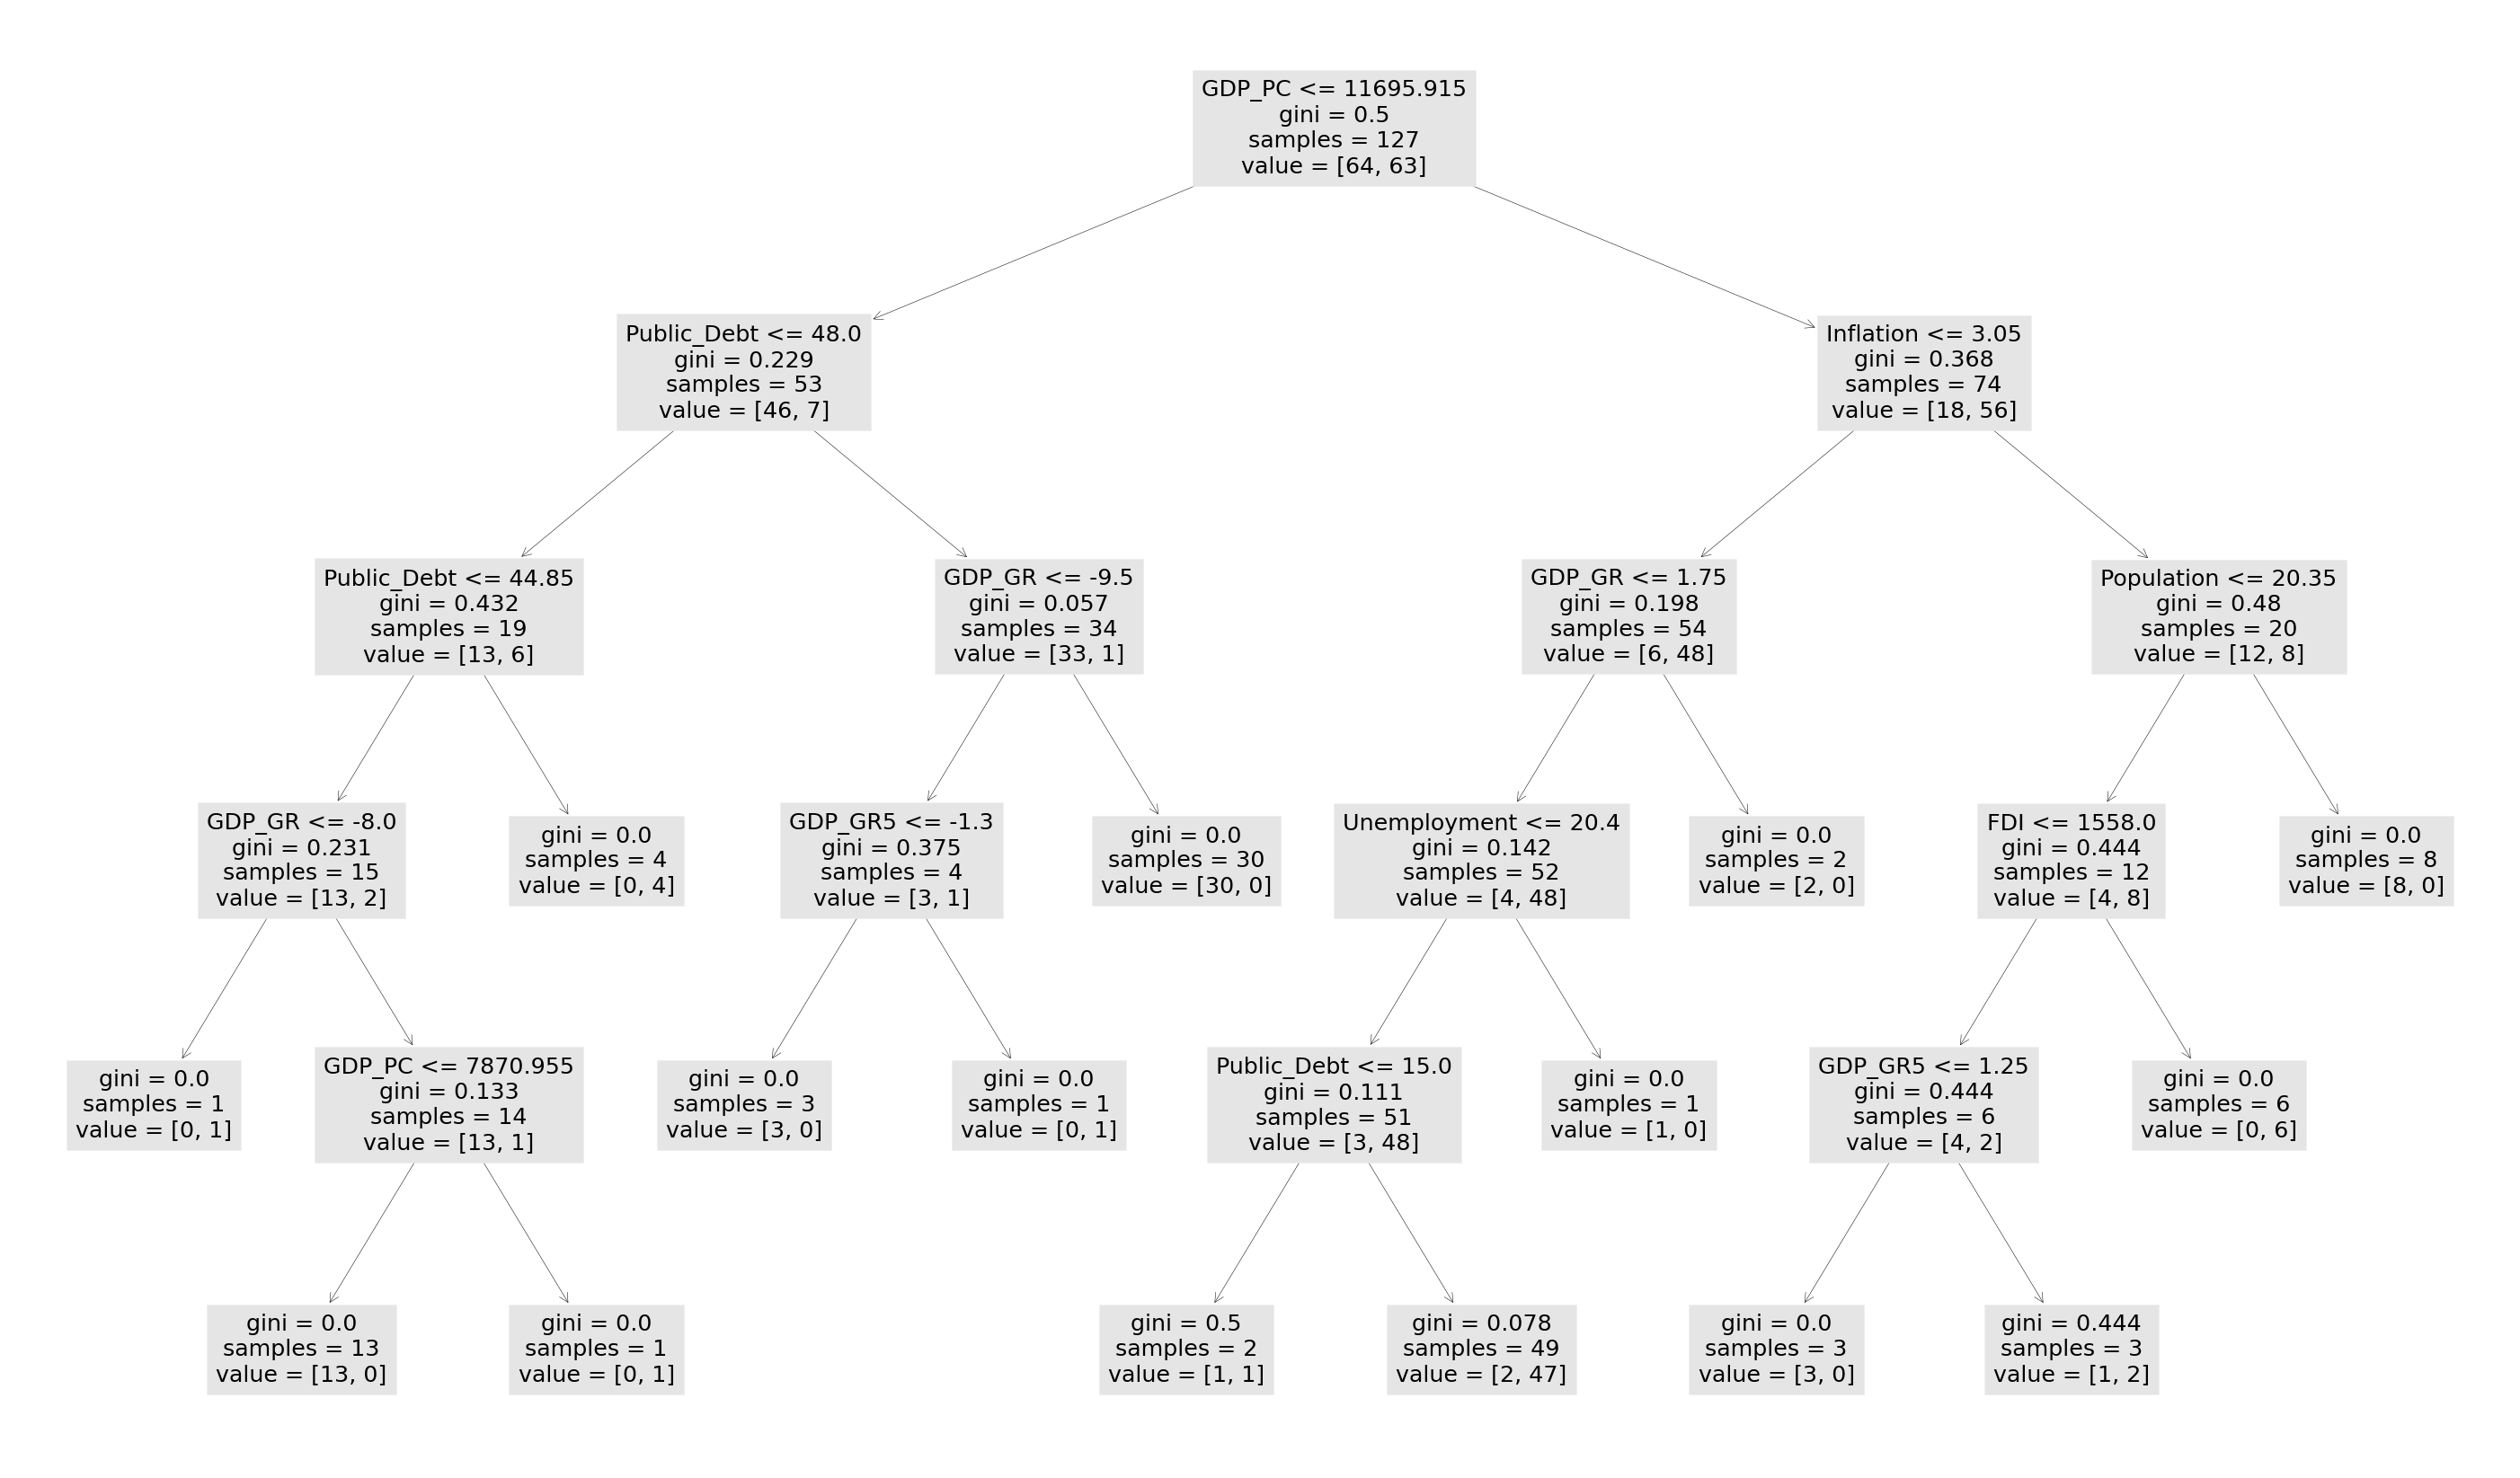

In [124]:
decision_tree_5 = DecisionTreeClassifier(max_depth=5) 
decision_tree_5.fit(train_d, train_lab) 
plt.figure(figsize=(50,30))
_ = tree.plot_tree(decision_tree_5, feature_names = vec.feature_names_) 
plt.show()